In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [176]:
df = pd.read_csv('./data/최종데이터/진짜최종데이터.csv')

In [177]:
df.head()

,종목명,연도,누적수익률,종합등급,환경,사회,지배구조,ROA,ROE,tobinQ,코스피누적수익률,LEV,SIZE,OCF,CAPEX
0,AJ네트웍스,2016,-16.696604,3.0,2.0,3.0,3.0,0.820595,3.995265,0.756037,0.244437,0.794608,28.364022,-0.089720,0.020694
1,AJ네트웍스,2017,-21.116001,3.0,3.0,3.0,3.0,0.877023,4.617270,0.719738,14.838077,0.810056,28.487236,-0.063067,0.022378
2,AJ네트웍스,2018,-15.324073,3.0,2.0,3.0,3.0,1.447255,7.577926,0.574388,17.010852,0.809017,28.576925,-0.032441,0.014980
3,AJ네트웍스,2019,-27.945367,3.0,1.0,3.0,3.0,2.336252,12.128881,0.651385,-8.843388,0.807381,28.220615,-0.021023,0.036102
4,AJ네트웍스,2020,-37.503193,3.0,1.0,3.0,3.0,-0.208845,-1.151640,0.556895,-4.513591,0.818654,28.093604,0.011161,0.026921


In [178]:
lev = ['종합등급', '환경', '사회', '지배구조']

for i in df.index:
    for col in lev:

        T = df.loc[i, col]

        if T < 3:
            df.loc[i, col] = 0
        elif T == 3:
            df.loc[i, col] = 1
        elif T > 3:
            df.loc[i, col] = 2


In [179]:
from statsmodels.formula.api import ols

In [180]:
df = df.astype({'종합등급':'int64','환경':'int64','사회':'int64','지배구조':'int64'})

In [181]:
df.describe()

,연도,누적수익률,종합등급,환경,사회,지배구조,ROA,ROE,tobinQ,코스피누적수익률,LEV,SIZE,OCF,CAPEX
count,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3.527000e+03,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000
mean,2016.107173,14.331555,1.116813,0.824497,1.204139,1.232492,2.242168,5.309359,1.112854e+04,3.690469,0.473449,27.201858,0.049521,-1.586884
std,2.649366,67.203085,0.529845,0.738758,0.540745,0.549159,12.181280,242.515005,1.386774e+05,8.430458,0.208587,1.876221,0.069674,96.633453
min,2011.000000,-97.254766,0.000000,0.000000,0.000000,0.000000,-95.635348,-2818.284747,-6.131463e+01,-8.843388,0.027552,13.060203,-0.479176,-5738.793512
25%,2014.000000,-23.852225,1.000000,0.000000,1.000000,1.000000,0.154049,0.374730,5.221416e-01,-1.211481,0.318019,26.207060,0.013631,0.004432
50%,2016.000000,-1.518556,1.000000,1.000000,1.000000,1.000000,2.402946,4.729742,8.404902e-01,2.619181,0.479834,27.088255,0.050090,0.020828
75%,2018.000000,32.073614,1.000000,1.000000,2.000000,2.000000,5.110998,9.226761,1.376326e+00,12.439058,0.618782,28.168829,0.085358,0.047628
max,2020.000000,714.625626,2.000000,2.000000,2.000000,2.000000,407.621431,13546.418464,3.053058e+06,17.010852,2.945354,33.566539,0.623319,25.122526


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

## 이상치 제거

In [52]:
## 이상치 제거
def outliers_iqr(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    # 넘파이 값을 퍼센트로 표시해주는 함수
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return np.where((data > upper_bound) | (data < lower_bound))

In [53]:
outlier_cols = ['ROA', 'ROE', 'OCF', 'CAPEX']
total_outliers = []
normal_index = []

for col in outlier_cols:
    outliers_index = outliers_iqr(df[col])[0]
    total_outliers.append(outliers_index)

total_outliers = [val for arr in total_outliers for val in arr]
print(len(total_outliers))

for i in df.index:
    if i not in total_outliers:
        normal_index.append(i)

1184


In [54]:
df_clean = df.loc[normal_index]

In [136]:
res = ols('ROA ~ 종합등급+ROE+LEV+SIZE+OCF+CAPEX', data=df_clean).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     4034.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        14:36:16   Log-Likelihood:                -4094.0
No. Observations:                2753   AIC:                             8202.
Df Residuals:                    2746   BIC:                             8243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4667      0.337      4.355      0.0

In [142]:
res = ols('ROE ~ 종합등급+ROA+LEV+SIZE+OCF+CAPEX', data=df_clean).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     3399.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        14:36:53   Log-Likelihood:                -5954.7
No. Observations:                2753   AIC:                         1.192e+04
Df Residuals:                    2746   BIC:                         1.196e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6789      0.662     -4.044      0.0

In [143]:
res = ols('tobinQ ~ 종합등급+연도+ROE+LEV+SIZE+OCF+CAPEX+누적수익률+코스피누적수익률', data=df_clean).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 tobinQ   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.67e-164
Time:                        14:37:00   Log-Likelihood:                -35173.
No. Observations:                2753   AIC:                         7.037e+04
Df Residuals:                    2743   BIC:                         7.043e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.435e+06    1.4e+06      1.024      0.3

In [110]:
# from sklearn.utils import shuffle
#
# def down_sampling(df, target):
#     desired_apriori=0.25
#
#     # Get the indices per target value
#     idx_0 = df[df[target] == 1].index
#     idx_1 = df[df[target] != 1].index
#
#     # Get original number of records per target value
#     nb_0 = len(df.loc[idx_0])
#     nb_1 = len(df.loc[idx_1]) / 2
#
#     # Calculate the undersampling rate and resulting number of records with target=0
#     undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
#     undersampled_nb_0 = int(undersampling_rate*nb_0)
#     print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
#     print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))
#
#     # Randomly select records with target=0 to get at the desired a priori
#     undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)
#
#     # Construct list with remaining indices
#     idx_list = list(undersampled_idx) + list(idx_1)
#
#     # Return undersample data frame
#     df = df.loc[idx_list].reset_index(drop=True)
#
#     return df

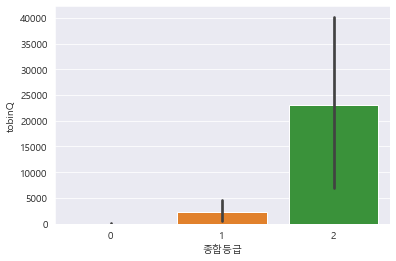

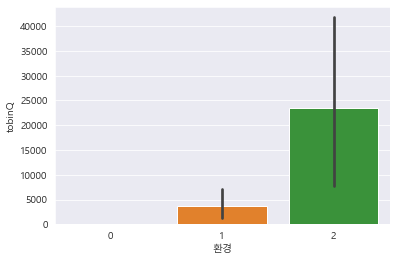

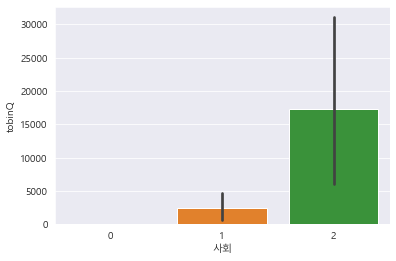

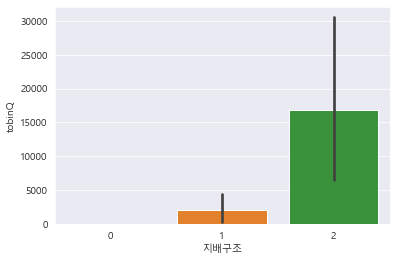

In [144]:
group = ['종합등급', '환경', '사회', '지배구조']
for g in group:
    sns.barplot(data=df_clean, x=g, y='tobinQ', estimator=np.mean)
    plt.show()

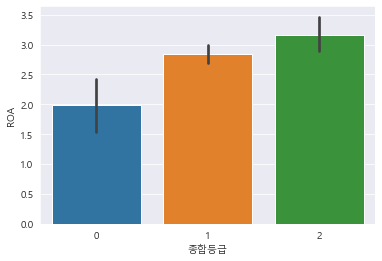

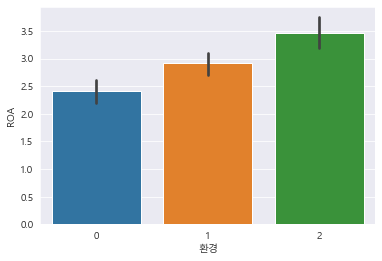

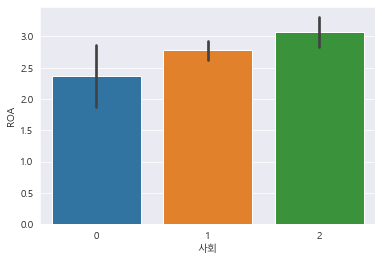

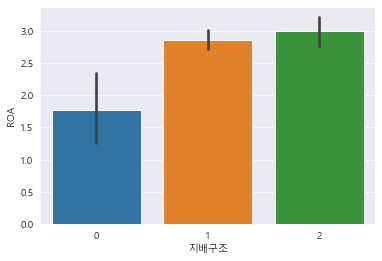

In [145]:
group = ['종합등급', '환경', '사회', '지배구조']
for g in group:
    sns.barplot(data=df_clean, x=g, y='ROA', estimator=np.mean)
    plt.show()

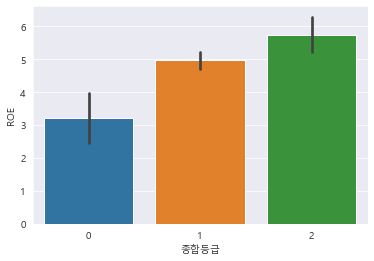

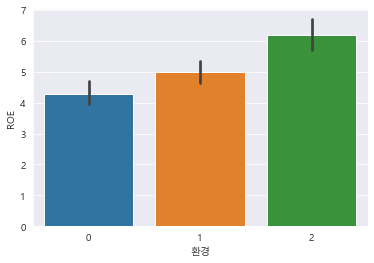

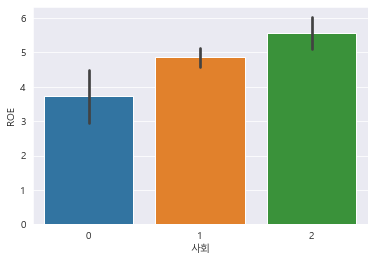

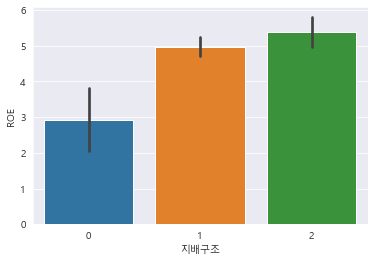

In [146]:
group = ['종합등급', '환경', '사회', '지배구조']
for g in group:
    sns.barplot(data=df_clean, x=g, y='ROE', estimator=np.mean)
    plt.show()